In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import time

In [2]:
# Load and scale the dataset

df =  pd.read_csv('/Users/eliasfirisa/Desktop/[HW6]_Practical_class_7 (1)/Preprocessed_Single_Cell_RNA_Seq_data.csv')

# Drop the non‐numeric index column ("Unnamed: 0")
#    After this, df has shape (M_genes, N_cells).
df_genes_by_cells = df.drop(columns=['Unnamed: 0'])
print("After dropping 'Unnamed: 0' (genes x cells):", df_genes_by_cells.shape)



After dropping 'Unnamed: 0' (genes x cells): (1000, 2100)


In [9]:
df_genes_by_cells = df.drop(columns=['Unnamed: 0'])
print("Rows (index) sample:", df_genes_by_cells.index[:5])
print("Columns (column names) sample:", df_genes_by_cells.columns[:5])


Rows (index) sample: RangeIndex(start=0, stop=5, step=1)
Columns (column names) sample: Index(['Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5'], dtype='object')


In [3]:
# Transpose so that rows become cells, columns become genes
#    Now each row is one cell's vector of M_genes expression values.
df_cells_by_genes = df_genes_by_cells.T
print("After transposing (cells × genes):", df_cells_by_genes.shape)

After transposing (cells × genes): (2100, 1000)


In [4]:
# Convert the transposed DataFrame to a NumPy array
X = df_cells_by_genes.values
print("X.shape (cells × genes) =", X.shape)
# Standardize each gene‐column (mean=0, std=1) across all cells
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)
print("X_scaled.shape =", X_scaled.shape)

X.shape (cells × genes) = (2100, 1000)
X_scaled.shape = (2100, 1000)


In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


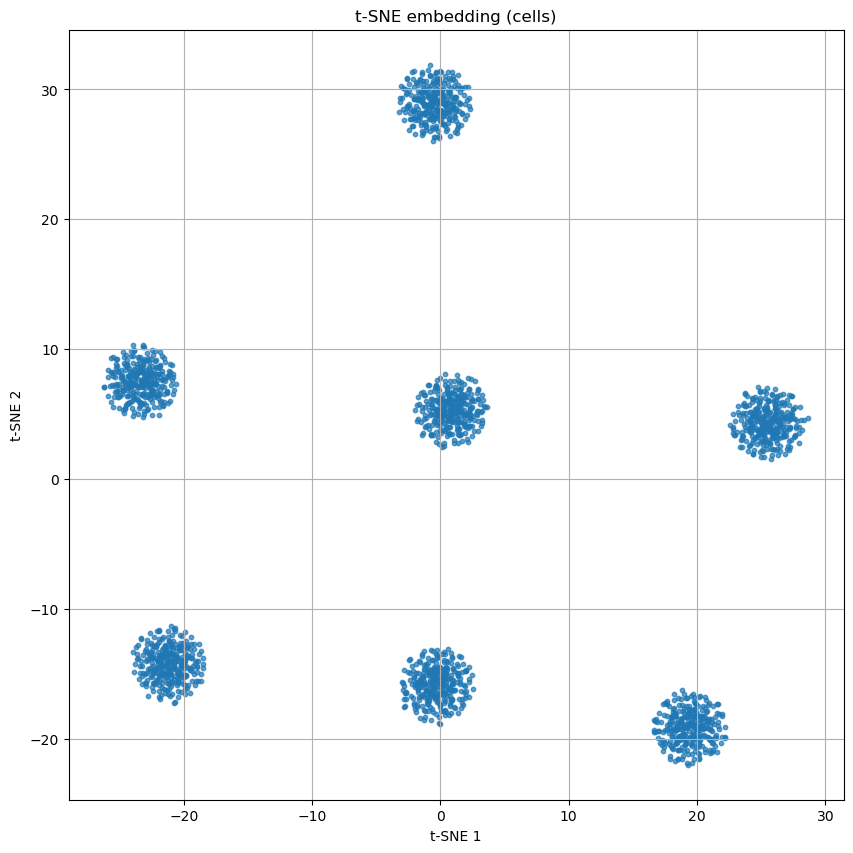

In [8]:
# t-SNE Plot
plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=10, alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE embedding (cells)')
plt.grid(True)
plt.show()

